# 金融数据分析和处理案例

### 1. 一些简单的金融应用和分析

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import tushare as ts
import warnings; warnings.simplefilter('ignore') #忽略可能会出现的警告信息，警告并不是错误，可以忽略；

In [3]:
hs300 = ts.get_k_data('hs300',start ='2018-01-01', end = '2019-04-30')
hs300.head()

,date,open,close,high,low,volume,code
0,2018-01-02,4045.21,4087.40,4087.78,4045.21,146935435.0,hs300
1,2018-01-03,4091.46,4111.39,4140.05,4088.73,151852218.0,hs300
2,2018-01-04,4114.12,4128.81,4137.64,4105.89,134543794.0,hs300
3,2018-01-05,4133.34,4138.75,4151.28,4123.28,149009872.0,hs300
4,2018-01-08,4140.85,4160.16,4166.32,4127.31,173877666.0,hs300


In [4]:
hs300.set_index('date', inplace = True)
hs300.head()

,open,close,high,low,volume,code
date,,,,,,
2018-01-02,4045.21,4087.40,4087.78,4045.21,146935435.0,hs300
2018-01-03,4091.46,4111.39,4140.05,4088.73,151852218.0,hs300
2018-01-04,4114.12,4128.81,4137.64,4105.89,134543794.0,hs300
2018-01-05,4133.34,4138.75,4151.28,4123.28,149009872.0,hs300
2018-01-08,4140.85,4160.16,4166.32,4127.31,173877666.0,hs300


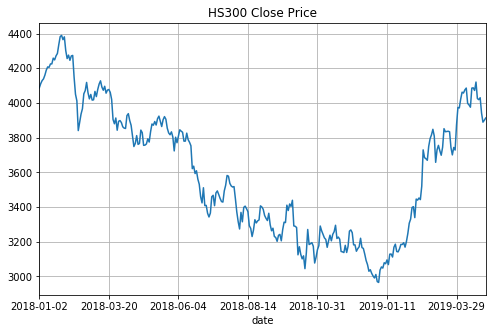

In [5]:
hs300['close'].plot(figsize=(8, 5), grid=True, title = 'HS300 Close Price')    #必背；

In [6]:
hs300['return'] = np.log(hs300['close'] / hs300['close'].shift(1))       #必背；SMA；连续收益的计算方法；

In [7]:
hs300[['close', 'return']].tail()

,close,return
date,,
2019-04-24,4030.09,0.002753
2019-04-25,3941.82,-0.022146
2019-04-26,3889.27,-0.013421
2019-04-29,3900.33,0.002840
2019-04-30,3913.21,0.003297


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023EEA10F2B0>,
      dtype=object)

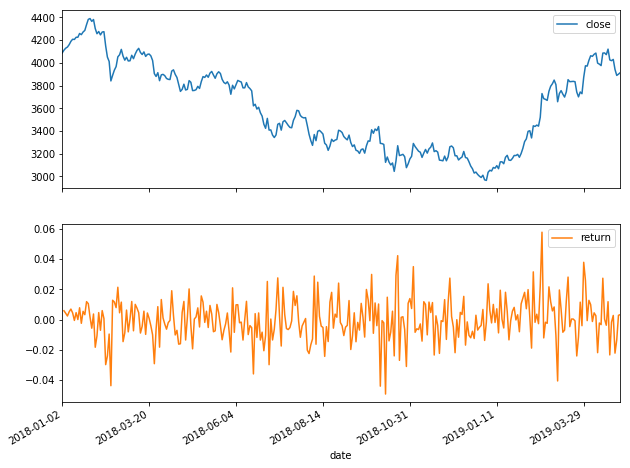

In [8]:
hs300[['close', 'return']].plot(subplots=True, figsize=(10, 8))

In [9]:
# 计算股价的移动平均，必背；SMA策略；      .rolling(window=).mean()
hs300['SMA20'] = hs300['close'].rolling(window=20).mean()
hs300.tail()

,open,close,high,low,volume,code,return,SMA20
date,,,,,,,,
2019-04-24,4033.63,4030.09,4044.34,3967.81,145498695.0,hs300,0.002753,3999.7200
2019-04-25,4013.60,3941.82,4022.56,3938.33,159722071.0,hs300,-0.022146,4009.6415
2019-04-26,3921.89,3889.27,3943.83,3887.25,142008068.0,hs300,-0.013421,4017.6850
2019-04-29,3896.58,3900.33,3953.23,3875.45,153870927.0,hs300,0.002840,4019.0845
2019-04-30,3887.18,3913.21,3923.11,3885.15,116233376.0,hs300,0.003297,4016.0485


In [11]:
# 用talib计算移动平均；talib：技术分析package；
import talib as ta
hs300['SMA20_ta'] = ta.SMA(np.asarray(hs300['close']),20)      #talib的数据结构有些指标只支持Ndarray格式；
hs300.tail()

,open,close,high,low,volume,code,return,SMA20,SMA20_ta
date,,,,,,,,,
2019-04-24,4033.63,4030.09,4044.34,3967.81,145498695.0,hs300,0.002753,3999.7200,3999.7200
2019-04-25,4013.60,3941.82,4022.56,3938.33,159722071.0,hs300,-0.022146,4009.6415,4009.6415
2019-04-26,3921.89,3889.27,3943.83,3887.25,142008068.0,hs300,-0.013421,4017.6850,4017.6850
2019-04-29,3896.58,3900.33,3953.23,3875.45,153870927.0,hs300,0.002840,4019.0845,4019.0845
2019-04-30,3887.18,3913.21,3923.11,3885.15,116233376.0,hs300,0.003297,4016.0485,4016.0485


In [12]:
hs300.head()

,open,close,high,low,volume,code,return,SMA20,SMA20_ta
date,,,,,,,,,
2018-01-02,4045.21,4087.40,4087.78,4045.21,146935435.0,hs300,NaN,NaN,NaN
2018-01-03,4091.46,4111.39,4140.05,4088.73,151852218.0,hs300,0.005852,NaN,NaN
2018-01-04,4114.12,4128.81,4137.64,4105.89,134543794.0,hs300,0.004228,NaN,NaN
2018-01-05,4133.34,4138.75,4151.28,4123.28,149009872.0,hs300,0.002405,NaN,NaN
2018-01-08,4140.85,4160.16,4166.32,4127.31,173877666.0,hs300,0.005160,NaN,NaN


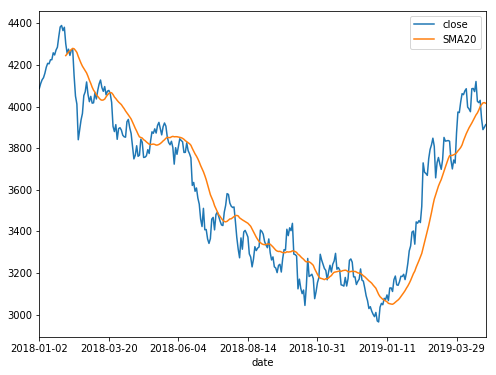

In [13]:
hs300[['close','SMA20']].plot(figsize = (8,6))

In [14]:
hs300['SMA60'] = hs300['close'].rolling(window=60, min_periods=5).mean()
hs300.head()

,open,close,high,low,volume,code,return,SMA20,SMA20_ta,SMA60
date,,,,,,,,,,
2018-01-02,4045.21,4087.40,4087.78,4045.21,146935435.0,hs300,NaN,NaN,NaN,NaN
2018-01-03,4091.46,4111.39,4140.05,4088.73,151852218.0,hs300,0.005852,NaN,NaN,NaN
2018-01-04,4114.12,4128.81,4137.64,4105.89,134543794.0,hs300,0.004228,NaN,NaN,NaN
2018-01-05,4133.34,4138.75,4151.28,4123.28,149009872.0,hs300,0.002405,NaN,NaN,NaN
2018-01-08,4140.85,4160.16,4166.32,4127.31,173877666.0,hs300,0.005160,NaN,NaN,4125.302


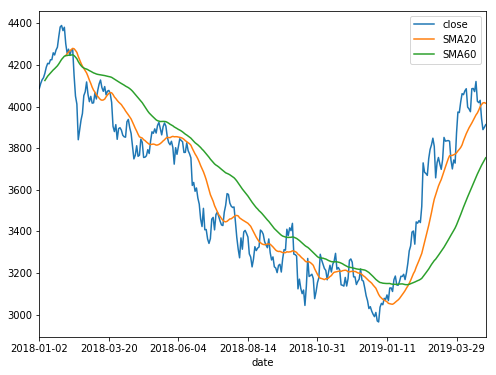

In [15]:
hs300[['close','SMA20','SMA60']].plot(figsize = (8,6))

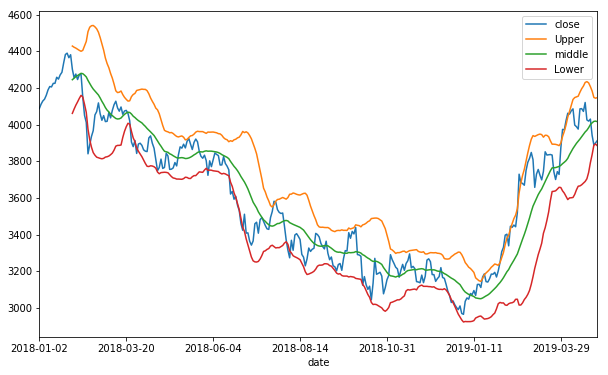

In [16]:
hs300['Upper'],hs300['middle'],hs300['Lower'] = ta.BBANDS(np.asarray(hs300['close']), timeperiod = 20, nbdevup = 2 , nbdevdn = 2, matype = 0) 
hs300[['close','Upper','middle','Lower']].plot(figsize = (10,6))

In [17]:
import math
hs300['Mov_Vol'] = hs300['return'].rolling(window=252, min_periods = 60).std() * math.sqrt(252)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023EEA45F4E0>,
      dtype=object)

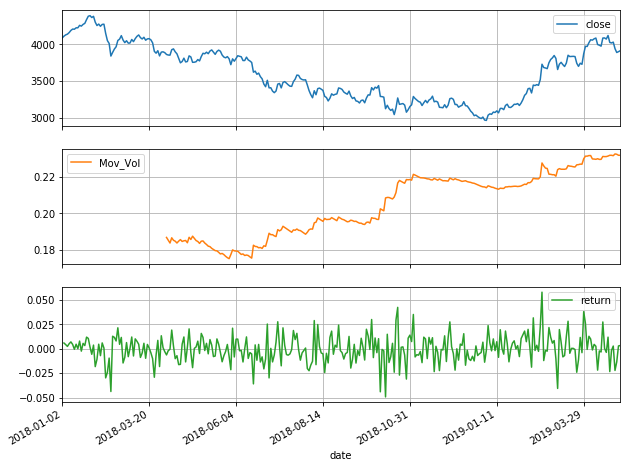

In [18]:
hs300[['close', 'Mov_Vol', 'return']].plot(subplots=True,figsize=(10,8), grid=True)

### 2. 爬取Tushare数据并做选股条件分析

In [19]:
import tushare as ts
# 获取沪深300股票代码列表
hs300 = ts.get_hs300s()['code'].tolist()        #tolist()：把数据转成list；
hs300[:10]

['600000',
 '600004',
 '600009',
 '600010',
 '600011',
 '600015',
 '600016',
 '600018',
 '600019',
 '600023']

In [20]:
type(hs300)

list

In [21]:
# 获取基本面数据
# rev: 收入同比（%）  profit：利润同比（%）  npr: 净利润率（%）
stock_basics = ts.get_stock_basics()
stock_basics.head()

,name,industry,area,pe,outstanding,totals,totalAssets,liquidAssets,fixedAssets,reserved,...,bvps,pb,timeToMarket,undp,perundp,rev,profit,gpr,npr,holders
code,,,,,,,,,,,,,,,,,,,,,
300116,坚瑞沃能,电气设备,陕西,0.00,12.94,24.33,1566351.50,1150821.75,238616.80,490198.44,...,-0.14,-14.68,20100902,-766017.63,-3.15,-90.40,-69.27,24.37,-503.89,68130.0
000677,恒天海龙,化纤,山东,1010.84,8.64,8.64,88712.68,34382.80,45130.65,69768.81,...,0.32,13.34,19961226,-149955.27,-1.74,32.77,287.29,15.19,0.45,77347.0
300152,科融环境,环境保护,江苏,9.27,7.13,7.13,195568.00,99731.43,19260.75,50605.01,...,1.11,4.12,20101229,-47372.92,-0.66,0.43,686.96,19.61,113.39,61878.0
001896,豫能控股,火力发电,河南,25.91,9.30,11.51,2086533.63,445571.75,1194374.75,500207.81,...,4.99,0.81,19980122,-58811.98,-0.51,-21.34,122.22,9.47,2.36,34008.0
600095,哈高科,区域地产,黑龙江,0.00,3.61,3.61,106868.85,37246.34,17327.35,26740.84,...,2.32,2.35,19970708,17464.70,0.48,189.72,-44.87,17.66,-7.98,44532.0


In [22]:
stock_basics.reset_index(inplace=True)      #reset_index重置dataFrame的索引
stock_basics.head()

,code,name,industry,area,pe,outstanding,totals,totalAssets,liquidAssets,fixedAssets,...,bvps,pb,timeToMarket,undp,perundp,rev,profit,gpr,npr,holders
0,300116,坚瑞沃能,电气设备,陕西,0.00,12.94,24.33,1566351.50,1150821.75,238616.80,...,-0.14,-14.68,20100902,-766017.63,-3.15,-90.40,-69.27,24.37,-503.89,68130.0
1,000677,恒天海龙,化纤,山东,1010.84,8.64,8.64,88712.68,34382.80,45130.65,...,0.32,13.34,19961226,-149955.27,-1.74,32.77,287.29,15.19,0.45,77347.0
2,300152,科融环境,环境保护,江苏,9.27,7.13,7.13,195568.00,99731.43,19260.75,...,1.11,4.12,20101229,-47372.92,-0.66,0.43,686.96,19.61,113.39,61878.0
3,001896,豫能控股,火力发电,河南,25.91,9.30,11.51,2086533.63,445571.75,1194374.75,...,4.99,0.81,19980122,-58811.98,-0.51,-21.34,122.22,9.47,2.36,34008.0
4,600095,哈高科,区域地产,黑龙江,0.00,3.61,3.61,106868.85,37246.34,17327.35,...,2.32,2.35,19970708,17464.70,0.48,189.72,-44.87,17.66,-7.98,44532.0


In [23]:
#isin():数据过滤的方法；从stcok_basics这张大表格里面把hs300的这300只股票代码给挑选出来；
data1 = stock_basics.loc[stock_basics['code'].isin(hs300),        
                         ['code', 'name', 'industry', 'pe', 'pb', 'esp','rev', 'profit',]]
data1.head()

,code,name,industry,pe,pb,esp,rev,profit
62,002601,龙蟒佰利,化工原料,12.92,2.48,0.320,9.02,4.19
132,000963,华东医药,化学制药,14.99,5.03,0.622,23.84,37.63
162,603288,XD海天味,食品,43.02,16.56,0.547,16.95,22.81
174,603160,汇顶科技,元器件,34.99,12.63,0.907,114.39,2039.95
190,002558,巨人网络,互联网,35.34,4.26,0.136,-36.42,-19.48


In [24]:
data1.columns = ['代码','名称', '行业', 'PE', 'PB', 'EPS', '收入%', '利润%']
data1.head()

,代码,名称,行业,PE,PB,EPS,收入%,利润%
62,002601,龙蟒佰利,化工原料,12.92,2.48,0.320,9.02,4.19
132,000963,华东医药,化学制药,14.99,5.03,0.622,23.84,37.63
162,603288,XD海天味,食品,43.02,16.56,0.547,16.95,22.81
174,603160,汇顶科技,元器件,34.99,12.63,0.907,114.39,2039.95
190,002558,巨人网络,互联网,35.34,4.26,0.136,-36.42,-19.48


In [25]:
# 获取盈利能力数据
stock_profit = ts.get_profit_data(2017,1)
stock_profit.head()

[Getting data:]###########################################################

,code,name,roe,net_profit_ratio,gross_profit_rate,net_profits,eps,business_income,bips
0,600423,*ST柳化,215.12,10.30,-1.3970,40.6863,0.1018,394.6887,0.9883
1,600306,商业城,71.97,71.48,17.3030,171.9346,0.9651,240.5080,1.3501
2,000717,韶钢松山,26.83,3.19,6.2247,168.1588,0.0695,5268.7636,2.1776
3,600133,东湖高新,26.81,55.22,11.6396,686.8356,1.0828,1243.7266,1.9609
4,002893,华通热力,25.83,21.81,32.2225,112.7380,1.2526,516.6846,5.7409


In [26]:
data2 = stock_profit.loc[stock_profit['code'].isin(hs300), ['code', 'roe', 'gross_profit_rate', 'net_profit_ratio']]

In [27]:
data2.columns = ['代码', 'ROE', '毛利率', '净利率']
data2 = round(data2,2)
data2.head()

,代码,ROE,毛利率,净利率
19,002027,12.20,67.60,45.72
22,600309,11.26,39.23,19.94
26,002714,10.72,40.47,34.55
34,300136,9.58,29.69,28.43
35,002304,9.52,61.23,36.14


In [28]:
# 获取成长能力数据
# nprg:净利润增长率（%）  nav:净资产增长率
stock_growth = ts.get_growth_data(2017,1)
data3 = stock_growth.loc[stock_growth['code'].isin(hs300), ['code', 'nprg']]
data3.columns = ['代码', 'NI%', ]
data3 = round(data3,2)
data3.head()

[Getting data:]#######################################################

,代码,NI%
1,002352,22009.06
7,000408,10539.82
20,601225,3805.27
28,002601,3002.91
33,000725,2443.31


In [29]:
from functools import reduce

# 数据合并
merge = lambda x,y: pd.merge(x, y, how='left', on='代码')     #定义了merge函数；
data = reduce(merge, [data1, data2, data3])
data.drop_duplicates(inplace=True)
data.head()

,代码,名称,行业,PE,PB,EPS,收入%,利润%,ROE,毛利率,净利率,NI%
0,002601,龙蟒佰利,化工原料,12.92,2.48,0.320,9.02,4.19,4.53,39.77,24.89,3002.91
1,000963,华东医药,化学制药,14.99,5.03,0.622,23.84,37.63,6.95,28.15,7.60,24.81
2,603288,XD海天味,食品,43.02,16.56,0.547,16.95,22.81,8.88,44.69,24.35,20.49
3,603160,汇顶科技,元器件,34.99,12.63,0.907,114.39,2039.95,6.02,47.36,23.97,150.42
4,002558,巨人网络,互联网,35.34,4.26,0.136,-36.42,-19.48,4.29,81.77,45.30,NaN


In [30]:
hs300 = pd.merge(data1,data2, how='left', on='代码')
hs300.head()

,代码,名称,行业,PE,PB,EPS,收入%,利润%,ROE,毛利率,净利率
0,002601,龙蟒佰利,化工原料,12.92,2.48,0.320,9.02,4.19,4.53,39.77,24.89
1,000963,华东医药,化学制药,14.99,5.03,0.622,23.84,37.63,6.95,28.15,7.60
2,603288,XD海天味,食品,43.02,16.56,0.547,16.95,22.81,8.88,44.69,24.35
3,603160,汇顶科技,元器件,34.99,12.63,0.907,114.39,2039.95,6.02,47.36,23.97
4,002558,巨人网络,互联网,35.34,4.26,0.136,-36.42,-19.48,4.29,81.77,45.30


In [31]:
hs300 = pd.merge(hs300,data3, how='left', on='代码')
hs300.drop_duplicates(inplace=True)             #去除重复数据；drop_duplicates()
hs300.head()

,代码,名称,行业,PE,PB,EPS,收入%,利润%,ROE,毛利率,净利率,NI%
0,002601,龙蟒佰利,化工原料,12.92,2.48,0.320,9.02,4.19,4.53,39.77,24.89,3002.91
1,000963,华东医药,化学制药,14.99,5.03,0.622,23.84,37.63,6.95,28.15,7.60,24.81
2,603288,XD海天味,食品,43.02,16.56,0.547,16.95,22.81,8.88,44.69,24.35,20.49
3,603160,汇顶科技,元器件,34.99,12.63,0.907,114.39,2039.95,6.02,47.36,23.97,150.42
4,002558,巨人网络,互联网,35.34,4.26,0.136,-36.42,-19.48,4.29,81.77,45.30,NaN


In [32]:
# 根据已有列计算新数据
data['估值系数'] = data['PE'] * data['PB']
data = round(data,2)
data.head(5)

,代码,名称,行业,PE,PB,EPS,收入%,利润%,ROE,毛利率,净利率,NI%,估值系数
0,002601,龙蟒佰利,化工原料,12.92,2.48,0.32,9.02,4.19,4.53,39.77,24.89,3002.91,32.04
1,000963,华东医药,化学制药,14.99,5.03,0.62,23.84,37.63,6.95,28.15,7.60,24.81,75.40
2,603288,XD海天味,食品,43.02,16.56,0.55,16.95,22.81,8.88,44.69,24.35,20.49,712.41
3,603160,汇顶科技,元器件,34.99,12.63,0.91,114.39,2039.95,6.02,47.36,23.97,150.42,441.92
4,002558,巨人网络,互联网,35.34,4.26,0.14,-36.42,-19.48,4.29,81.77,45.30,NaN,150.55


In [33]:
#条件选股；
data_filtered = data.loc[(data['估值系数'] < 60) & (data['ROE'] > 5),
                     ['代码', '名称', 'PE', 'PB', '估值系数', 'ROE', '收入%']]


In [34]:
data_filtered.head()

,代码,名称,PE,PB,估值系数,ROE,收入%
21,002304,洋河股份,10.65,4.53,48.24,9.52,14.18
23,600398,海澜之家,8.48,3.04,25.78,9.13,5.23
29,000651,格力电器,14.16,3.44,48.71,6.93,2.49
37,000333,美的集团,13.65,3.73,50.91,6.64,7.84
49,600690,青岛海尔,12.49,2.66,33.22,6.13,10.17


In [35]:
print('筛选结果共 %d 只个股' % len(data_filtered))     #占位符格式化；format格式化；

筛选结果共 18 只个股


In [36]:
# 按选定字段对数据进行排序
data_filtered.sort_values(['估值系数'], ascending=True, inplace=True)    # sort_values具体实战应用；
data_filtered.head(10)

,代码,名称,PE,PB,估值系数,ROE,收入%
115,002714,牧原股份,0.00,13.69,0.00,10.72,10.62
136,000625,长安汽车,0.00,0.86,0.00,5.22,-20.00
200,600177,雅戈尔,11.00,1.14,12.54,5.47,53.31
187,601225,陕西煤业,7.83,1.65,12.92,7.13,14.44
224,601238,广汽集团,10.69,1.50,16.04,7.99,-25.74
77,600340,华夏幸福,7.55,2.40,18.12,5.64,8.51
76,600115,东方航空,11.43,1.64,18.75,5.62,12.34
247,601318,中国平安,8.15,2.48,20.21,5.60,21.81
23,600398,海澜之家,8.48,3.04,25.78,9.13,5.23
49,600690,青岛海尔,12.49,2.66,33.22,6.13,10.17


In [37]:
# 数据分类
def map_func(x):
    """
    作为 apply 函数的参数传入
    :param x: df 中一行或一列数据，取决于 apply 函数的参数 axis
    :return: 将每个计算结果组合，返回一个 series
    """
    if x['ROE'] > 5:
        return '高成长'
    elif x['ROE'] >= 0:
        return '低成长'
    elif x['ROE'] < 0:
        return '亏损'
    
# 根据 ROE 数据计算“成长性”
data['成长性'] = data.apply(map_func, axis=1)
data.tail(10)

,代码,名称,行业,PE,PB,EPS,收入%,利润%,ROE,毛利率,净利率,NI%,估值系数,成长性
302,002555,三七互娱,互联网,15.58,4.41,0.21,95.46,10.80,8.73,66.89,26.75,107.50,68.71,高成长
303,002241,歌尔股份,元器件,37.17,1.96,0.06,41.02,10.56,2.66,22.33,6.60,48.26,72.85,低成长
304,600233,圆通速递,仓储物流,23.11,3.01,0.13,20.65,15.66,3.29,11.70,7.99,1376.69,69.56,低成长
305,300033,同花顺,软件服务,104.63,13.24,0.19,20.48,33.25,3.96,85.15,38.15,-28.77,1385.30,低成长
306,002450,*ST康得,化工原料,0.00,0.90,-0.09,-84.87,-142.77,3.35,37.59,20.05,35.81,0.00,低成长
307,000876,新 希 望,饲料,25.54,3.12,0.16,9.49,10.38,NaN,NaN,NaN,-6.03,79.68,None
308,603858,步长制药,中成药,21.05,1.72,0.32,18.61,37.79,1.73,81.42,9.15,14.62,36.21,低成长
309,300433,蓝思科技,元器件,0.00,1.71,-0.02,6.95,-188.18,1.54,24.92,5.36,33.20,0.00,低成长
310,601018,宁波港,港口,19.24,1.51,0.06,6.86,2.64,1.93,29.86,17.86,2.02,29.05,低成长
311,600518,康美药业,中成药,43.52,1.51,0.04,0.18,-14.58,3.54,29.58,14.92,8.10,65.72,低成长


In [38]:
# 对高成长分类按照‘烟蒂系数’做升序排列
# 选择具体的某一列，按照一定的顺序进行呈现；
data_growth = data[data['成长性'] == '高成长'].sort_values(['估值系数'], ascending=True)
data_growth.head(20)

,代码,名称,行业,PE,PB,EPS,收入%,利润%,ROE,毛利率,净利率,NI%,估值系数,成长性
115,002714,牧原股份,农业综合,0.00,13.69,-0.26,10.62,-497.64,10.72,40.47,34.55,84.81,0.00,高成长
136,000625,长安汽车,汽车整车,0.00,0.86,-0.44,-20.00,-250.62,5.22,15.15,13.59,-10.13,0.00,高成长
200,600177,雅戈尔,服饰,11.00,1.14,0.21,53.31,48.02,5.47,46.77,37.17,-50.95,12.54,高成长
187,601225,陕西煤业,煤炭开采,7.83,1.65,0.28,14.44,-2.35,7.13,55.72,21.78,3805.27,12.92,高成长
224,601238,广汽集团,汽车整车,10.69,1.50,0.27,-25.74,-28.40,7.99,23.82,22.67,103.59,16.04,高成长
77,600340,华夏幸福,区域地产,7.55,2.40,0.97,8.51,29.61,5.64,62.39,22.47,43.97,18.12,高成长
76,600115,东方航空,空运,11.43,1.64,0.14,12.34,1.16,5.62,12.44,11.48,5.40,18.75,高成长
247,601318,中国平安,保险,8.15,2.48,2.55,21.81,77.10,5.60,12.29,8.67,10.05,20.21,高成长
23,600398,海澜之家,服饰,8.48,3.04,0.27,5.23,6.96,9.13,39.06,19.57,5.49,25.78,高成长
49,600690,青岛海尔,家用电器,12.49,2.66,0.34,10.17,9.41,6.13,30.10,4.60,10.34,33.22,高成长


In [39]:
data_profit = data[data['成长性'] == '高成长'].sort_values(['ROE'], ascending=False)
data_profit.head()

,代码,名称,行业,PE,PB,EPS,收入%,利润%,ROE,毛利率,净利率,NI%,估值系数,成长性
188,002027,分众传媒,影视音像,64.04,6.19,0.02,-11.78,-71.81,12.20,67.60,45.72,71.73,396.41,高成长
145,600309,万华化学,化工原料,12.07,3.29,0.89,-8.30,-45.98,11.26,39.23,19.94,375.02,39.71,高成长
115,002714,牧原股份,农业综合,0.00,13.69,-0.26,10.62,-497.64,10.72,40.47,34.55,84.81,0.00,高成长
292,300136,信维通信,通信设备,24.07,5.94,0.25,26.92,14.85,9.58,29.69,28.43,180.20,142.98,高成长
21,002304,洋河股份,白酒,10.65,4.53,2.67,14.18,15.70,9.52,61.23,36.14,11.46,48.24,高成长


In [40]:
def group_func(df):
    """
    作为 groupby.apply 函数的参数传入
    :param df: 实际是经过聚合后的单一类的 dataframe
    :return: 返回 df 按照’烟蒂系数‘排序后前两位
    """
    return df.sort_values(['估值系数'], ascending=True)[:2]

# 按‘成长性’分组，筛选每个分组中‘烟蒂系数’最低的两个个股


In [41]:
data_grouped = data.groupby('成长性')

In [42]:
data_grouped.size()

成长性
亏损      13
低成长    229
高成长     51
dtype: int64

In [43]:
data_grouped = data.groupby('成长性').apply(group_func)
data_grouped

代码    名称    行业   PE     PB   EPS    收入%     利润%    ROE    毛利率  \
成长性                                                                          
亏损  103  600372  中航电子    航空  0.0   3.59 -0.02  39.91   37.12  -0.43  36.74   
    146  600583  海油工程  石油开采  0.0   1.05 -0.06  42.78   27.55  -0.74  -7.71   
低成长 309  300433  蓝思科技   元器件  0.0   1.71 -0.02   6.95 -188.18   1.54  24.92   
    114  600549  厦门钨业   小金属  0.0   2.46 -0.02  11.68 -187.38   1.98  25.36   
高成长 115  002714  牧原股份  农业综合  0.0  13.69 -0.26  10.62 -497.64  10.72  40.47   
    136  000625  长安汽车  汽车整车  0.0   0.86 -0.44 -20.00 -250.62   5.22  15.15   

           净利率     NI%  估值系数  成长性  
成长性                                
亏损  103  -2.86 -141.59   0.0   亏损  
    146 -12.17 -115.79   0.0   亏损  
低成长 309   5.36   33.20   0.0  低成长  
    114   5.48  248.84   0.0  低成长  
高成长 115  34.55   84.81   0.0  高成长  
    136  13.59  -10.13   0.0  高成长

In [44]:
data_grouped = data.groupby('行业').apply(group_func)
data_grouped.head(10)

代码    名称    行业     PE    PB   EPS    收入%    利润%   ROE    毛利率  \
行业                                                                           
专用机械 131  300024   机器人  专用机械  89.64  3.89  0.04   5.11  10.81  1.03  32.67   
中成药  308  603858  步长制药   中成药  21.05  1.72  0.32  18.61  37.79  1.73  81.42   
     301  000423  东阿阿胶   中成药  17.03  2.29  0.60 -23.83 -35.48  6.74  70.80   
乳制品  89   600887  伊利股份   乳制品  20.46  7.06  0.37  17.89   8.36  6.98  37.64   
互联网  302  002555  三七互娱   互联网  15.58  4.41  0.21  95.46  10.80  8.73  66.89   
     4    002558  巨人网络   互联网  35.34  4.26  0.14 -36.42 -19.48  4.29  81.77   
仓储物流 304  600233  圆通速递  仓储物流  23.11  3.01  0.13  20.65  15.66  3.29  11.70   
     273  002468  申通快递  仓储物流  20.55  3.74  0.27  55.10   7.22  5.59  21.78   
保险   218  601628  中国人寿    保险   7.51  2.19  0.92  17.87  92.59  1.98   2.78   
     247  601318  中国平安    保险   8.15  2.48  2.55  21.81  77.10  5.60  12.29   

            净利率      NI%    估值系数  成长性  
行业                                     
专用机械 131  12.84     3.41  348.70  低成长  
中成药  308   9.15    14.62   36.21  低成长  
     301  36.06    10.50   39.00  高成长  
乳制品  89   11.03    11.53  144.45  高成长  
互联网  302  26.75   107.50   68.71  高成长  
     4    45.30      NaN  150.55  低成长  
仓储物流 304   7.99  1376.69   69.56  低成长  
     273  14.81      NaN   76.86  高成长  
保险   218   2.26    17.13   16.45  低成长  
     247   8.67    10.05   20.21  高成长